In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Iris 데이터 불러오기, Train/Test set 분할

In [2]:
iris = load_iris()
X = iris.data[:, :4] # 4개의 특징을 모두 사용
y = iris.target

# 성능 측정을 위한 train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=30) # test_size: 테스트에 사용할 비율. 0 ~ 1.0 사이의 값

In [3]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(105, 4)
(105,)
(45, 4)
(45,)


In [4]:
x_train[:5]

array([[5.2, 3.4, 1.4, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 2.7, 5.3, 1.9]])

In [5]:
y_train[:5]

array([0, 1, 1, 2, 2])

In [6]:
x_test[:5]

array([[5.7, 2.5, 5. , 2. ],
       [5. , 3.2, 1.2, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 3.2, 5.3, 2.3]])

In [7]:
y_test[:5]

array([2, 0, 2, 1, 2])

### 학습 / 결과분석 (Decision Tree)

In [8]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [9]:
# Train
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
# Predict
pred = model.predict(x_test)

# Accuracy
(pred == y_test).mean()

0.9111111111111111

In [11]:
# for visualization
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

In [12]:
export_graphviz(model, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                max_depth = 10, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )

In [13]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=300'])

0

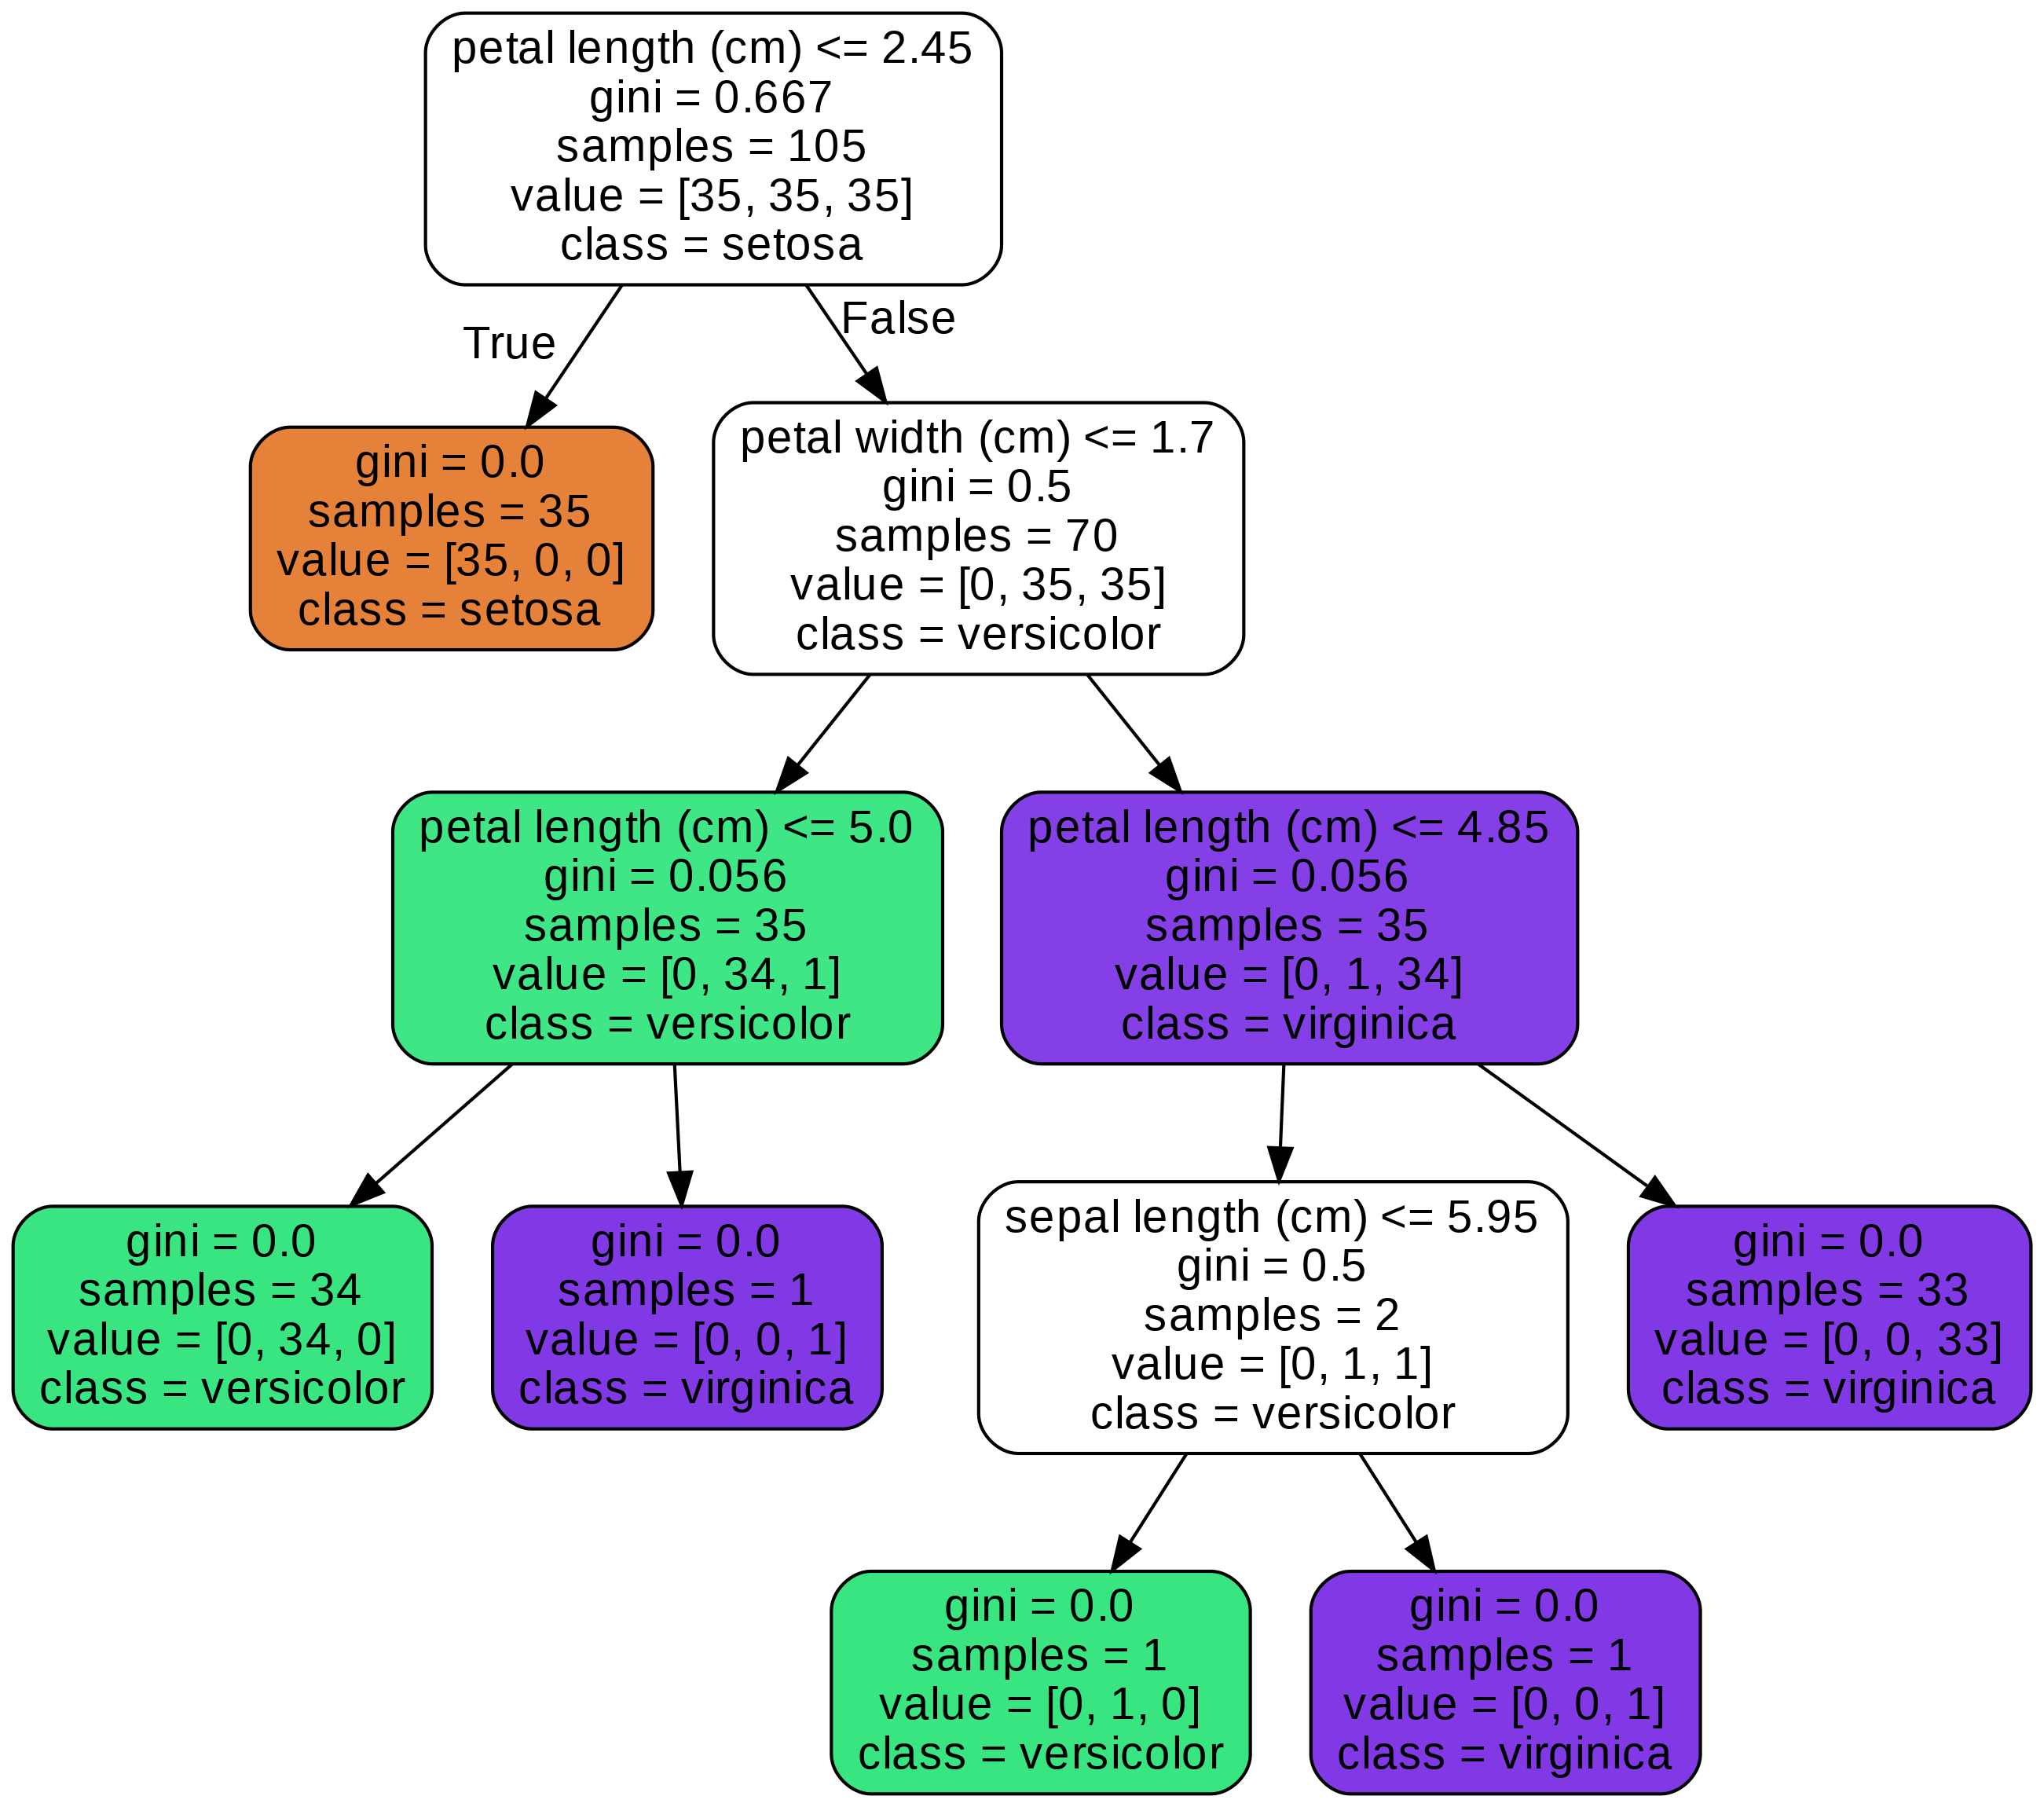

In [14]:
Image(filename = 'decistion-tree.png')

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

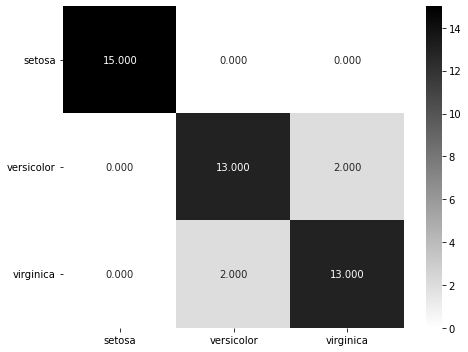

In [16]:
# confusion matrix 그리기
x_lab = iris.target_names
y_lab = iris.target_names

conf_matrix = confusion_matrix(y_test, pred)
#conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

### 학습 / 결과분석 (Random Forest)

In [17]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)

In [18]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [19]:
# Predict
pred = model_rf.predict(x_test)

# Accuracy
(pred == y_test).mean()

0.9111111111111111

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

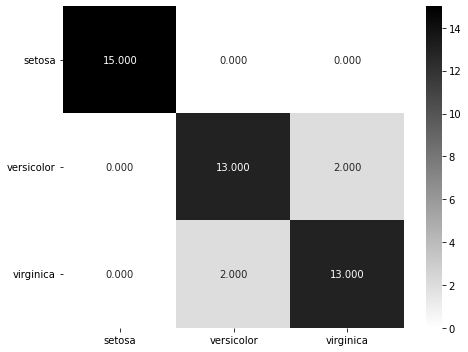

In [21]:
# confusion matrix 그리기
x_lab = iris.target_names
y_lab = iris.target_names

conf_matrix = confusion_matrix(y_test, pred)
#conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()